# Performance Analysis for PSAIIM implementations
PDC - project

## Serial Implementation

Step 1: Parse and Extract Runtimes into a CSV

In [2]:
import re
import csv

# Read the file
with open("serial_results_raw.txt", "r") as file:
    content = file.read()

# Find all NUM_NODES and execution times using regex
num_nodes = re.findall(r"NUM_NODES\s*=\s*(\d+)", content)
exec_times = re.findall(r"Total execution time\(without data loading time\):\s*(\d+)\s*ms", content)

# Convert to integers
num_nodes = list(map(int, num_nodes))
exec_times = list(map(int, exec_times))

# Write to CSV
with open("runtimes.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["NUM_NODES", "EXECUTION_TIME_MS"])
    writer.writerows(zip(num_nodes, exec_times))

print("Data written to runtimes.csv")


Data written to runtimes.csv


Step 2: Plot the Runtimes

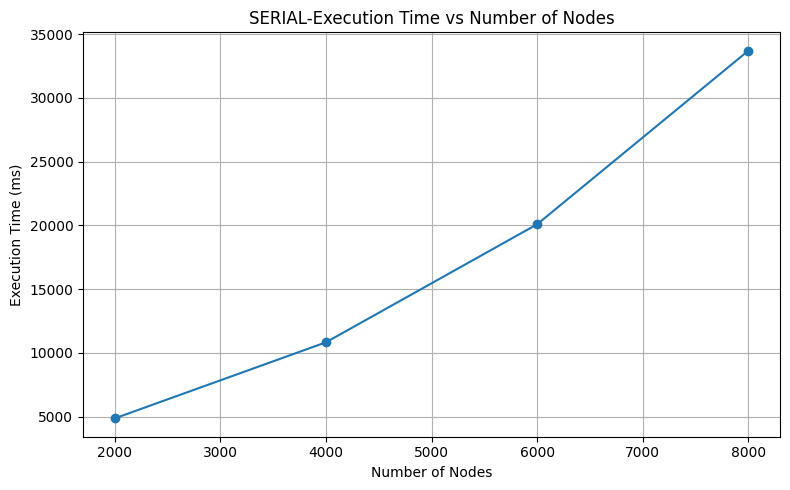

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("runtimes.csv")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df["NUM_NODES"], df["EXECUTION_TIME_MS"], marker='o')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (ms)")
plt.title("SERIAL-Execution Time vs Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.savefig("runtime_plot.png")  # Optional: Save the plot
plt.show()

## Serial + MPI Implementation